## 0. EDA 

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 




In [435]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the "mpg" dataset
df = sns.load_dataset("mpg")

# Print the first few rows of the dataset
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.



In [436]:
# a) Initial EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [437]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [438]:
# Check for missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [439]:
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 
 

In [441]:
# b) Describe relevant columns
df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration','cylinders']].describe().T


,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0



&nbsp; c) Make some plots on some of the columns that you find interesting.



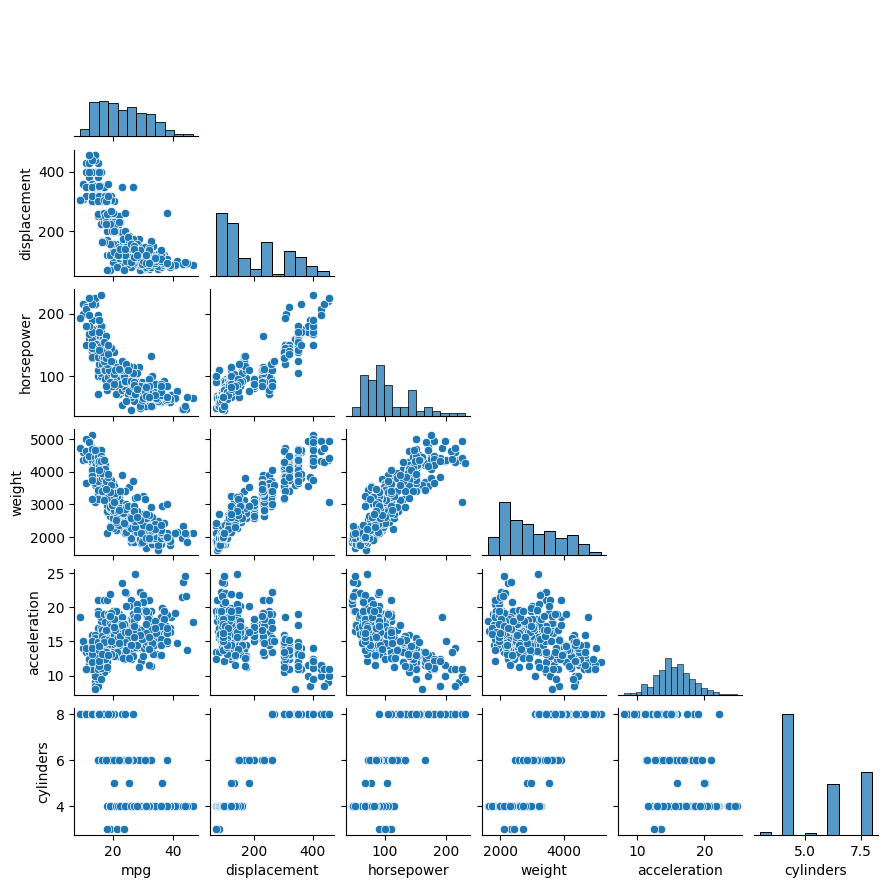

In [442]:
# c) Plot some interesting columns
sns.pairplot(df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration','cylinders']],corner=True,height=1.5)



<Axes: >

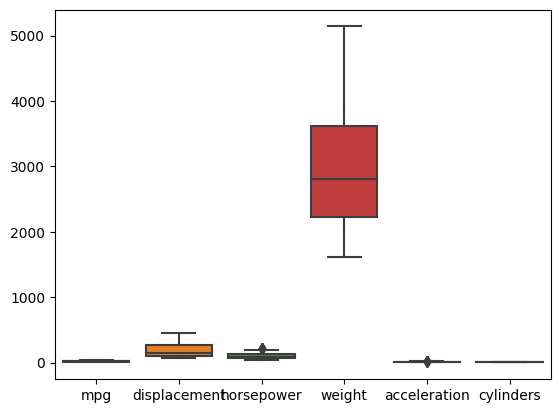

In [443]:
sns.boxplot(data=df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration','cylinders']])

&nbsp; d) Check if there are any columns you might want to drop.

In [444]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [445]:
# I have chosen to drop the columns origin and name.
df= df.drop(columns=['origin', 'name']) 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [446]:
df.shape

(392, 7)

## 1. Train|test split 

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

In [447]:
X,y = df.drop("mpg", axis = "columns"),df["mpg"]
print(X.head(),y.head())

   cylinders  displacement  horsepower  weight  acceleration  model_year
0          8         307.0       130.0    3504          12.0          70
1          8         350.0       165.0    3693          11.5          70
2          8         318.0       150.0    3436          11.0          70
3          8         304.0       150.0    3433          12.0          70
4          8         302.0       140.0    3449          10.5          70 0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


In [448]:
# train|test split using scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape,y_train.shape, X_test.shape,y_test.shape

((313, 6), (313,), (79, 6), (79,))

In [449]:
# manual calculation to check against the shapes after train|test split

train_fraction = int(len(df) * 0.8) # split 80% training and 20% test

train = df.sample(n=train_fraction, random_state=42, replace=False)
test = df.drop(train.index)

X_train, y_train = train.drop("mpg", axis = "columns"), train["mpg"]
X_test, y_test = test.drop("mpg", axis = "columns"), test["mpg"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((313, 6), (313,), (79, 6), (79,))

### Feature standardization

In [450]:
from sklearn.preprocessing import MinMaxScaler
# we use normalization here
# instantiate a scalar instance
scaler = MinMaxScaler()
scaler.fit(X_train) # use the training data to fit the scaler

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [451]:

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

# calculates parameters sigma and mu based on X_train and transform X_train
#scaled_X_train= scaler.fit_transform(X_train) 

# uses the parameters sigma and mu that was calculated before to transform X_test
#scaled_X_test= scaler.transform(X_test)

#scaled_X_test.mean(), scaled_X_test.std(), scaled_X_train.mean(), scaled_X_train.std(), 

In [452]:
scaled_X_train.shape, scaled_X_test.shape

((313, 6), (79, 6))

## 2. Function for evaluation 

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

In [453]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


def train_predict_evaluate(X_train, X_test, y_train, y_test, model):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Compute the evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f'{mae = },\n{mse = },\n{rmse = }')
    return mae, mse, rmse



In [454]:
# create an instance of the model
model = LinearRegression()

# call the function with the training and test data
result = train_predict_evaluate(X_train, X_test, y_train, y_test, model)
result

mae = 2.5122878771522257,
mse = 9.553422178313197,
rmse = 3.090861073926358


(2.5122878771522257, 9.553422178313197, 3.090861073926358)

# 3. Compare models 

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

In [455]:
# Linear regression (SVD)

linear_regression_SVD = train_predict_evaluate(X_train, X_test, y_train, y_test, model)
linear_regression_SVD

mae = 2.5122878771522257,
mse = 9.553422178313197,
rmse = 3.090861073926358


(2.5122878771522257, 9.553422178313197, 3.090861073926358)

In [456]:
# Linear regression (SVD) with scaled data

linear_regression_SVD_scaled_data = train_predict_evaluate(scaled_X_train, scaled_X_test, y_train, y_test, model)
linear_regression_SVD_scaled_data

mae = 2.5122878771522257,
mse = 9.553422178313202,
rmse = 3.0908610739263582


(2.5122878771522257, 9.553422178313202, 3.0908610739263582)

In [457]:
# Stochastic gradient descent with scaled data (feature standardization)
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss = "squared_error", max_iter = 10000)
SGD_scaled_data = train_predict_evaluate(scaled_X_train, scaled_X_test, y_train, y_test, model)
SGD_scaled_data

mae = 2.6090629149026734,
mse = 10.57496719815865,
rmse = 3.2519174648441878


(2.6090629149026734, 10.57496719815865, 3.2519174648441878)

## Polynomial with degree 1

In [458]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# PolynomialFeatures creates feature matrix to represent the polynomial combinations
poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(X) #we create the new polynomial features.

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# calculates parameters sigma and mu based on X_train and transform X_train 
scaled_X_train = scaler.fit_transform(X_train)

# uses the parameters sigma and mu that was calculated before to transform X_test
scaled_X_test = scaler.transform(X_test)


model = LinearRegression()
poly_degree1 = train_predict_evaluate(scaled_X_train, scaled_X_test, y_train, y_test, model)
poly_degree1


mae = 2.5038600897761243,
mse = 10.502370329417298,
rmse = 3.240736078334257


(2.5038600897761243, 10.502370329417298, 3.240736078334257)

## Polynomial with degree 2

In [459]:

# PolynomialFeatures creates feature matrix to represent the polynomial combinations
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X) #we create the new polynomial features.

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train) # calculates parameters sigma and mu based on X_train and transform X_train 
scaled_X_test = scaler.transform(X_test) # uses the parameters sigma and mu that was calculated before to transform X_test

# calling function
model = LinearRegression()
poly_degree2 = train_predict_evaluate(scaled_X_train, scaled_X_test, y_train, y_test, model)
poly_degree2

mae = 1.9804772095191396,
mse = 7.419858147287931,
rmse = 2.723941656366364


(1.9804772095191396, 7.419858147287931, 2.723941656366364)

## Polynomial with degree 3

In [460]:
# PolynomialFeatures creates feature matrix to represent the polynomial combinations
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X) #we create the new polynomial features.

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train) # calculates parameters sigma and mu based on X_train and transform X_train 
scaled_X_test = scaler.transform(X_test) # uses the parameters sigma and mu that was calculated before to transform X_test

# calling function
model = LinearRegression()
poly_degree3 = train_predict_evaluate(scaled_X_train, scaled_X_test, y_train, y_test, model)
poly_degree3

mae = 2.11787732763047,
mse = 9.273527428750205,
rmse = 3.0452466942351655


(2.11787732763047, 9.273527428750205, 3.0452466942351655)

In [461]:
df = pd.DataFrame({'Linear regr. SVD':linear_regression_SVD, 'Linear regr. SVD scaled':linear_regression_SVD_scaled_data,'Linear regr. SGD':SGD_scaled_data, 'Polynom. regr. deg 1':poly_degree1,'Polynom. regr. deg 2':poly_degree2,'Polynom. regr. deg 3':poly_degree3},index=['mae', 'mse', 'rmse'])
df

,Linear regr. SVD,Linear regr. SVD scaled,Linear regr. SGD,Polynom. regr. deg 1,Polynom. regr. deg 2,Polynom. regr. deg 3
mae,2.512288,2.512288,2.609063,2.503860,1.980477,2.117877
mse,9.553422,9.553422,10.574967,10.502370,7.419858,9.273527
rmse,3.090861,3.090861,3.251917,3.240736,2.723942,3.045247
